In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar datos
data_path = '/Users/luissalamanca/Desktop/Duoc/Machine/ML_Proyecto_Semestral/data/03_features/engineered_data.csv'
data = pd.read_csv(data_path, sep=';')

# Separar columnas concatenadas
if len(data.columns) == 1:
    column_name = data.columns[0]
    if ',' in column_name:
        new_columns = column_name.split(',')
        data_split = data[column_name].str.split(',', expand=True)
        data_split.columns = new_columns
        for col in data_split.columns:
            data_split[col] = pd.to_numeric(data_split[col], errors='coerce')
        data = data_split

# Lista de features y target
features = [
    'EconomicEfficiency',
    'EffectivenessScore',
    'EquipmentAdvantage',
    'KillAssistRatio',
    'StealthKillsRatio'
]
X = data[features]
y = data['KDA']

# Dividir en entrenamiento/prueba (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [2]:
pipeline_tree = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

param_tree = {
    'regressor__max_depth': [3, 5, 7, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

gs_tree = GridSearchCV(
    estimator=pipeline_tree,
    param_grid=param_tree,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# Ajustar GridSearchCV para Árbol
gs_tree.fit(X_train, y_train)

# Mejor modelo y predicción
best_tree = gs_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

# Métricas
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("\n=== ÁRBOL DE REGRESIÓN ===")
print("Mejores hiperparámetros encontrados:")
print(gs_tree.best_params_)
print(f"R² (Coef. determinación): {r2_tree:.4f}")
print(f"MSE:  {mse_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")
print(f"MAE:  {mae_tree:.4f}")

# Importancia de características del mejor árbol
importances = best_tree['regressor'].feature_importances_
print("\nImportancia de características (mejor Árbol):")
for feat, imp in zip(features, importances):
    print(f"  {feat}: {imp:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== ÁRBOL DE REGRESIÓN ===
Mejores hiperparámetros encontrados:
{'regressor__max_depth': 5, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2}
R² (Coef. determinación): 0.8916
MSE:  0.0790
RMSE: 0.2810
MAE:  0.1734

Importancia de características (mejor Árbol):
  EconomicEfficiency: 0.0012
  EffectivenessScore: 0.9955
  EquipmentAdvantage: 0.0001
  KillAssistRatio: 0.0032
  StealthKillsRatio: 0.0000


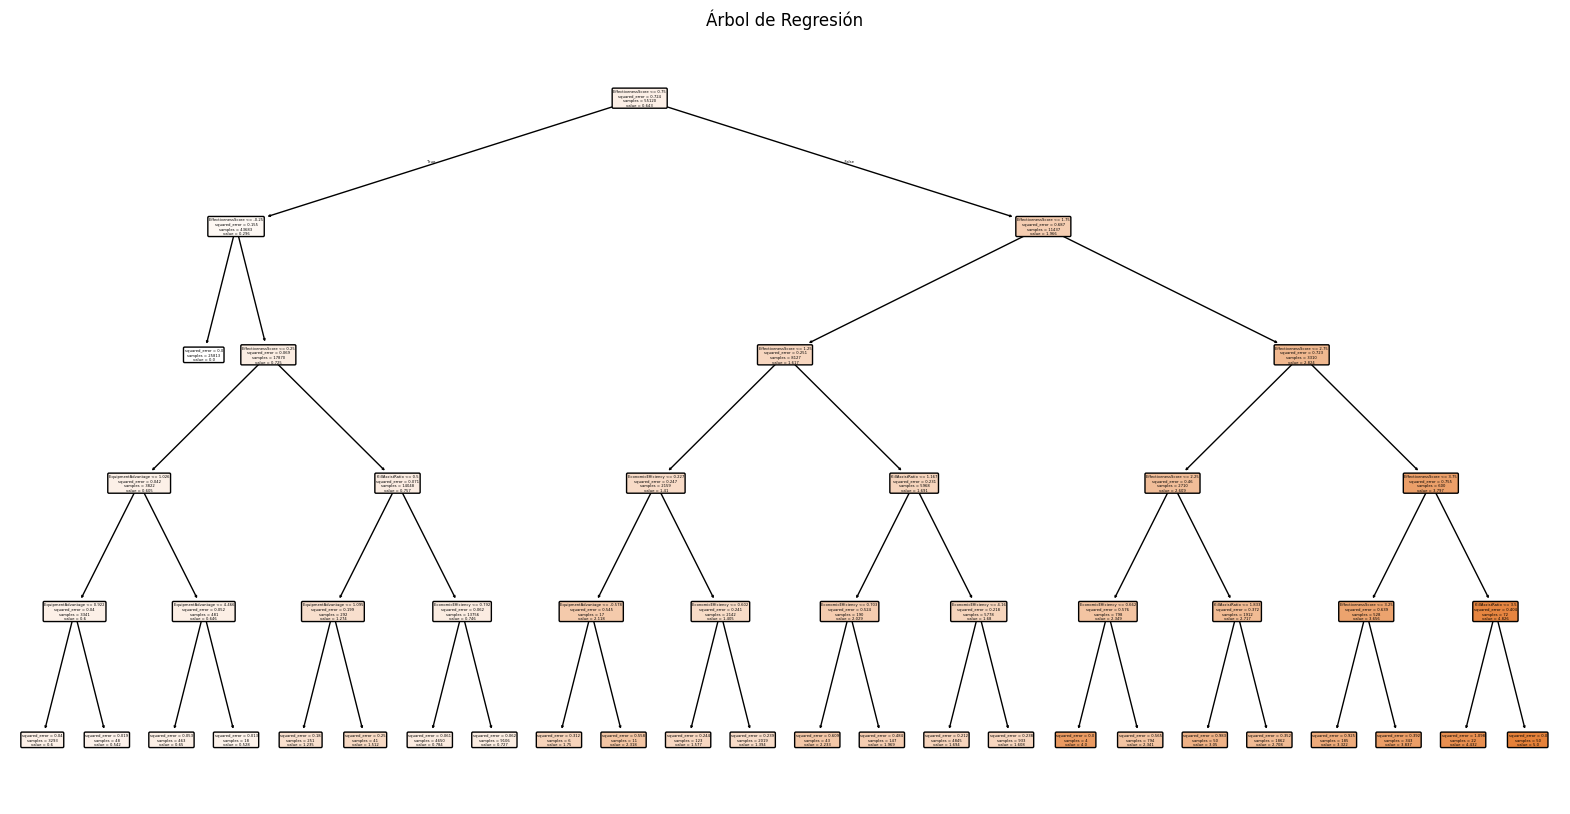

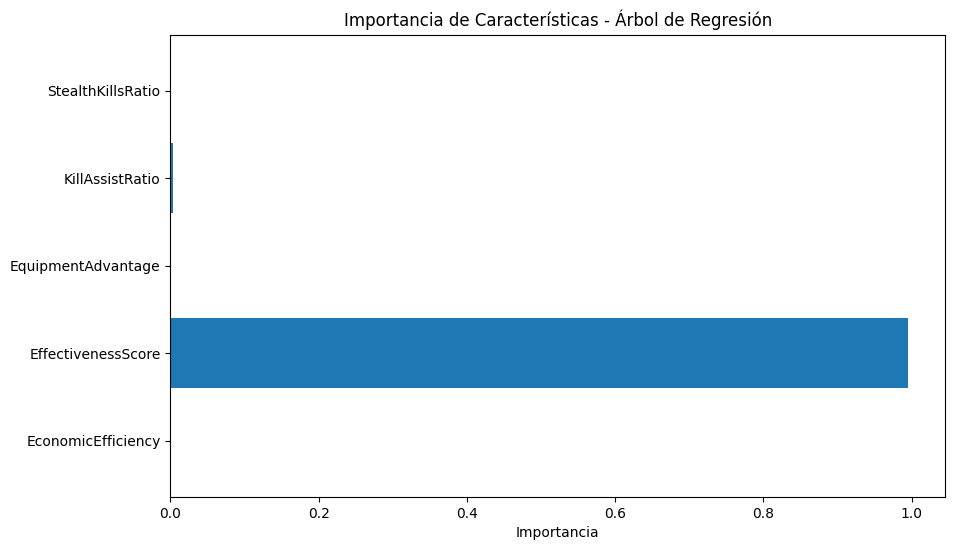

In [10]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_tree['regressor'], 
    feature_names=features,
    filled=True,
    rounded=True,
    max_depth=5  # Para mejor visualización
)
plt.title('Árbol de Regresión')
plt.show()

# Gráfico de importancia de características
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importancia')
plt.title('Importancia de Características - Árbol de Regresión')
plt.show()